In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from scipy.spatial import Voronoi,voronoi_plot_2d
from shapely.geometry import Polygon
from shapely.geometry import MultiPolygon
from shapely.ops import unary_union
import geopandas as gpd
import folium
import mplleaflet
import cartopy.crs as ccrs
from datetime import datetime

In [2]:
df=pd.read_csv("Data.csv")

In [3]:
df=df.drop('Date',axis=1)
df=df.drop('Time',axis=1)
df=df.values


In [4]:
# plt.scatter(df)
# plt.xlabel("Longitude")
# plt.ylabel("Latitude")
# plt.show()

In [5]:
df = df[:, [1, 0]]
print(df)

[[77.11656474 28.75112741]
 [77.11652977 28.74757716]
 [77.11721415 28.75357876]
 [77.11721415 28.75357876]
 [77.11721415 28.75357876]
 [77.11721415 28.75357876]
 [77.11721415 28.75357876]
 [77.11721415 28.75357876]
 [77.11721415 28.75357876]
 [77.11721415 28.75357876]
 [77.11721415 28.75357876]
 [77.11721415 28.75357876]
 [77.11721415 28.75357876]
 [77.11721415 28.75357876]
 [77.11721415 28.75357876]
 [77.11721415 28.75357876]
 [77.11721415 28.75357876]
 [77.11721415 28.75357876]
 [77.11721415 28.75357876]
 [77.11721415 28.75357876]
 [77.11721415 28.75357876]
 [77.11721415 28.75357876]
 [77.11721415 28.75357876]
 [77.11721415 28.75357876]
 [77.11721415 28.75357876]
 [77.11721415 28.75357876]
 [77.11721415 28.75357876]
 [77.11721415 28.75357876]
 [77.11721415 28.75357876]
 [77.11721415 28.75357876]
 [77.11721415 28.75357876]
 [77.11721415 28.75357876]
 [77.11721415 28.75357876]
 [77.11721415 28.75357876]
 [77.11721415 28.75357876]
 [77.11721415 28.75357876]
 [77.11721415 28.75357876]
 

In [6]:
dbscan=DBSCAN(eps=0.0002, min_samples=4)
dbscan.fit(df)

DBSCAN(eps=0.0002, min_samples=4)

In [7]:

# Get cluster labels
labels = dbscan.labels_

# Separate core, boundary, and noise points
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

boundary_points_mask = labels == -1  # Points on the boundary have label -1
noise_points_mask = labels == -1

core_points = df[core_samples_mask]
boundary_points = df[boundary_points_mask]
noise_points = df[noise_points_mask]

# # Plot core points
# plt.figure(figsize=(8, 6))
# plt.scatter(core_points['Longitude'], core_points['Latitude'], c='blue', marker='o', label='Core Points')
# plt.xlabel("Longitude")
# plt.ylabel("Latitude")
# plt.title("Core Points")
# plt.legend()
# plt.show()

# # Plot boundary points
# plt.figure(figsize=(8, 6))
# plt.scatter(boundary_points['Longitude'], boundary_points['Latitude'], c='yellow', marker='o', label='Boundary Points')
# plt.xlabel("Longitude")
# plt.ylabel("Latitude")
# plt.title("Boundary Points")
# plt.legend()
# plt.show()

# # Plot noise points
# plt.figure(figsize=(8, 6))
# plt.scatter(noise_points['Longitude'], noise_points['Latitude'], c='green', marker='o', label='Noise Points')
# plt.xlabel("Longitude")
# plt.ylabel("Latitude")
# plt.title("Noise Points")
# plt.legend()
# plt.show()

# # Plot all points
# plt.figure(figsize=(8, 6))
# plt.scatter(df['Longitude'], df['Latitude'], c=labels, cmap='viridis', marker='o', label='All Points')
# plt.xlabel("Longitude")
# plt.ylabel("Latitude")
# plt.title("All Points with DBSCAN Clustering")
# plt.legend()
# plt.show()


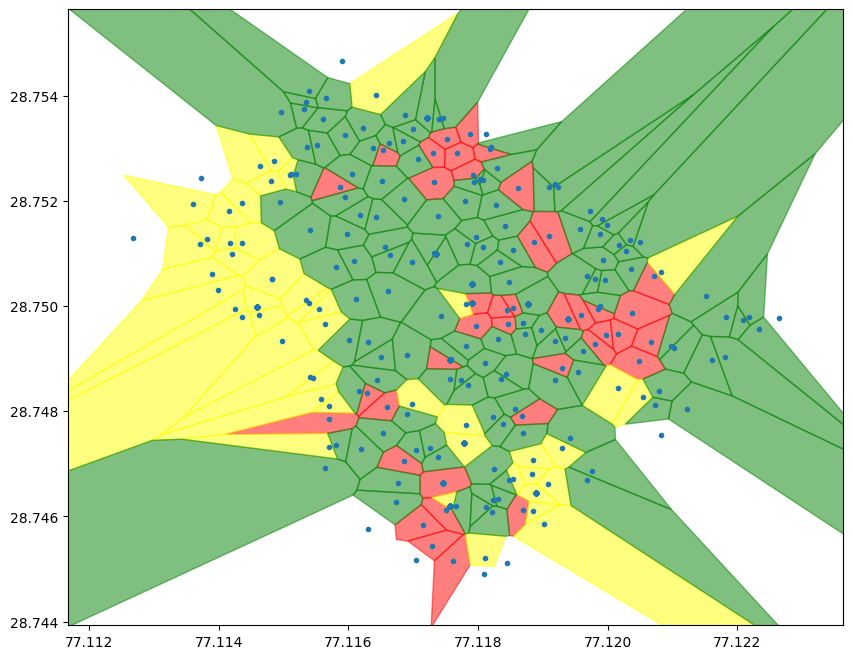

In [8]:
vor = Voronoi(df)
core_regions = []
boundary_regions = []
noise_regions = []

for i, region in enumerate(vor.regions):
    label = dbscan.labels_[i]
    if label != -1: 
        if label in dbscan.core_sample_indices_:
            core_regions.append(region)
        else:
            boundary_regions.append(region)
    else:
        noise_regions.append(region)


fig, ax = plt.subplots(figsize=(10, 8))
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='white', line_width=0) 

for region in core_regions:
    if -1 not in region and len(region) > 0:
        polygon = [vor.vertices[i] for i in region]
        polygon = np.array(polygon)
        ax.fill(polygon[:, 0], polygon[:, 1], color='red', alpha=0.5)

for region in boundary_regions:
    if -1 not in region and len(region) > 0:
        polygon = [vor.vertices[i] for i in region]
        polygon = np.array(polygon)
        ax.fill(polygon[:, 0], polygon[:, 1], color='yellow', alpha=0.5)

for region in noise_regions:
    if -1 not in region and len(region) > 0:
        polygon = [vor.vertices[i] for i in region]
        polygon = np.array(polygon)
        ax.fill(polygon[:, 0], polygon[:, 1], color='green', alpha=0.5)






(77.11009649287354, 77.123959360951, 28.743319863981082, 28.75573596363587)

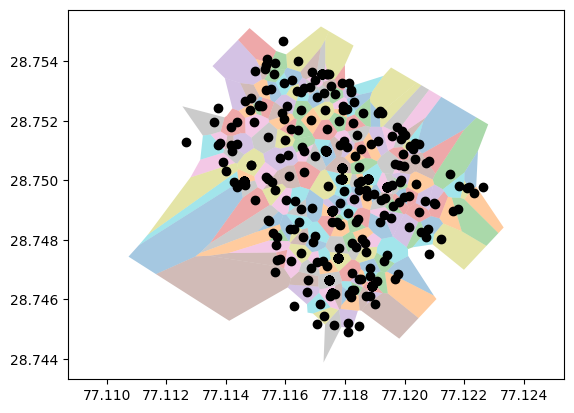

In [9]:
points=df
# Get Voronoi vertices and regions
vertices = vor.vertices
regions = vor.regions


# Create a box polygon to limit the plotting area
box = Polygon([[77.1156973 ,28.7560458], [77.1086163 ,28.7487843], [77.1180362 ,28.7427829], [77.1252459 ,28.7504586], [77.1156973 ,28.7560458]])

# Create finite regions using Shapely and filter based on bounds
finite_polygons = []
for region in regions:
    if -1 in region or not region:
        continue
    polygon = vertices[region]
    finite_poly = Polygon(polygon)
    if finite_poly.intersects(box):
        finite_poly = finite_poly.intersection(box)
        if finite_poly.is_empty:
            continue
        finite_polygons.append(finite_poly)

# Create a MultiPolygon of finite polygons
finite_regions = MultiPolygon(finite_polygons)

# Plot the finite Voronoi diagram
for polygon in finite_regions.geoms:
    plt.fill(*polygon.exterior.xy, alpha=0.4)

# Plot the input points
plt.plot(points[:, 0], points[:, 1], 'ko')
plt.axis('equal')


In [10]:

# Get cluster labels
cluster_labels = dbscan.labels_
unique_labels = np.unique(cluster_labels)

# Get cluster centroids
cluster_centroids = []
for label in unique_labels:
    if label != -1:  # Ignore noise points
        cluster_points = df[cluster_labels == label]
        centroid = np.mean(cluster_points, axis=0)
        cluster_centroids.append(centroid)

In [11]:
cluster_centroids


[array([77.1172301 , 28.75357799]),
 array([77.11745387, 28.74664235]),
 array([77.11734502, 28.75099568]),
 array([77.11757639, 28.74620131]),
 array([77.11459257, 28.74997898]),
 array([77.11777957, 28.74739126]),
 array([77.11757238, 28.74898346]),
 array([77.11799575, 28.75242039]),
 array([77.11790785, 28.75006223]),
 array([77.11889631, 28.74644353]),
 array([77.11939329, 28.74976496]),
 array([77.11790214, 28.75041816]),
 array([77.11876686, 28.75004751])]

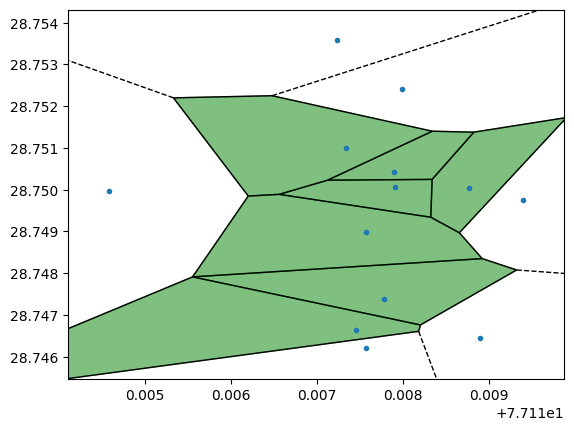

In [12]:


# Create Voronoi diagram based on cluster centroids
vor = Voronoi(cluster_centroids)

# Determine which Voronoi regions correspond to core points, boundary points, or noise points
core_regions = []
boundary_regions = []
noise_regions = []

for i, region in enumerate(vor.regions):
    label = cluster_labels[i]
    if label != -1:  # Not a noise point
        if label in dbscan.core_sample_indices_:
            core_regions.append(region)
        else:
            boundary_regions.append(region)
    else:
        noise_regions.append(region)

# # Plot the Voronoi diagram with colored interior for core, boundary, or noise regions
fig, ax = plt.subplots()
voronoi_plot_2d(vor, ax=ax, show_vertices=False)

# Color the interior of the Voronoi polygons
for region in core_regions:
    if -1 not in region and len(region) > 0:
        polygon = [vor.vertices[i] for i in region]
        polygon = np.array(polygon)
        ax.fill(polygon[:, 0], polygon[:, 1], color='red', alpha=0.5)

for region in boundary_regions:
    if -1 not in region and len(region) > 0:
        polygon = [vor.vertices[i] for i in region]
        polygon = np.array(polygon)
        ax.fill(polygon[:, 0], polygon[:, 1], color='green', alpha=0.5)

for region in noise_regions:
    if -1 not in region and len(region) > 0:
        polygon = [vor.vertices[i] for i in region]
        polygon = np.array(polygon)
        ax.fill(polygon[:, 0], polygon[:, 1], color='yellow', alpha=0.5)

# # # Define the clipping polygon coordinates
# # polygon_coordinates = np.array([
# # [77.1156973 ,28.7560458],[77.1086163 ,28.7487843],[77.1180362 ,28.7427829],[77.1252459 ,28.7504586],[77.1156973 ,28.7560458]
# # ])
# # polygon_coordinates=polygon_coordinates[:, [1, 0]]

# # # Convert the coordinates into a Shapely Polygon
# # clipping_polygon = Polygon(polygon_coordinates)

# # # Clip the Voronoi diagram
# # clipped_regions = []
# # for region in core_regions + boundary_regions + noise_regions:
# #     polygon = [vor.vertices[i] for i in region]
# #     polygon = Polygon(polygon)
# #     intersection = clipping_polygon.intersection(polygon)
# #     if not intersection.is_empty:
# #         if intersection.geom_type == 'Polygon':
# #             clipped_regions.append(list(intersection.exterior.coords))
# #         elif intersection.geom_type == 'MultiPolygon':
# #             for part in intersection:
# #                 if not part.is_empty:
# #                     clipped_regions.append(list(part.exterior.coords))

# # from shapely.validation import explain_validity

# # # Check for validity and fix invalid geometries
# # for region in clipped_regions:
# #     polygon = Polygon(region)
# #     if not polygon.is_valid:
# #         polygon = polygon.buffer(0)
# #         if not polygon.is_valid:
# #             explanation = explain_validity(polygon)
# #             print(f"Invalid Geometry: {explanation}")
# #         else:
# #             clipped_regions.append(list(polygon.exterior.coords))

# # Create a plot for the clipped Voronoi diagram
# fig, ax = plt.subplots()

# for region in clipped_regions:
#     x, y = zip(*region)
#     plt.fill(x, y, color='blue', alpha=0.5)

# # # You can also plot the boundary of the clipping polygon if needed
# # x, y = zip(*polygon_coordinates)
# # plt.plot(x, y, color='black')

# # plt.xlabel("Longitude")
# # plt.ylabel("Latitude")
# # plt.title("Clipped Voronoi Diagram for DBSCAN Clusters")
# # plt.show()



Voronoi plot saved as voronoi_map.html


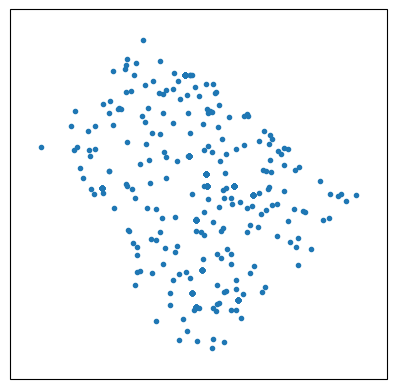

In [13]:
vor = Voronoi(df)
core_regions = []
boundary_regions = []
noise_regions = []
points=df
m = folium.Map(location=[28.749786, 77.117506], zoom_start=16)

for i, region in enumerate(vor.regions):
    label = dbscan.labels_[i]
    if label != -1:  # Not a noise point
        if label in dbscan.core_sample_indices_:
            core_regions.append(region)
        else:
            boundary_regions.append(region)
    else:
        noise_regions.append(region)
# Plot the Voronoi diagram with red interior and no visible boundary for all clusters
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='white', line_width=0)  # Hide boundary lines
outer_boundary_coords = [
[77.1060017 ,28.7502606],
[77.1147564 ,28.7492824],
[77.1162799 ,28.7458772],
[77.1208074 ,28.7434503],
[77.1250989 ,28.7475704],
[77.1273735 ,28.7498843],
[77.1218591 ,28.7545122],
[77.1161296 ,28.7591398],
[77.1060017 ,28.7502606 ]# Closing the polygon by having the last point as the same as the first
]
outer_boundary = Polygon(outer_boundary_coords[::-1])


for region in core_regions:
    if -1 not in region and len(region) > 0:
        polygon = [vor.vertices[i] for i in region]
        polygon = np.array(polygon)
        polygon = [point[::-1] for point in polygon]
        polygon=Polygon(polygon)
        clipped_polygon = polygon.intersection(outer_boundary)
        if not clipped_polygon.is_empty:
            clipped_coords = list(clipped_polygon.exterior.coords)
            folium.Polygon(locations=clipped_coords, color='blue', fill=True, fill_color='red', fill_opacity=0.8).add_to(m)

# Save the map as an HTML file
m.save('test.html')

print("Voronoi plot saved as voronoi_map.html")



In [14]:
points=df
m = folium.Map(location=[28.749786, 77.117506], zoom_start=16)

# Convert (latitude, longitude) to (longitude, latitude) for plotting

# Create the Voronoi polygons
# for region in vor.regions:
#     if -1 in region or not region:  # Skip infinite regions and empty regions
#         continue
#     polygon = [vor.vertices[i] for i in region]
#     # Convert (latitude, longitude) to (longitude, latitude) for plotting
#     polygon = [point[::-1] for point in polygon]
#     folium.Polygon(locations=polygon, color='blue', fill=True, fill_color='blue', fill_opacity=0.4).add_to(m)

for region in core_regions:
    if -1 not in region and len(region) > 0:
        polygon = [vor.vertices[i] for i in region]
        polygon = np.array(polygon)
        polygon = [point[::-1] for point in polygon]
        polygon=Polygon(polygon)
        area=polygon.area
        if(area<0.000001):
            polygon=list(polygon.exterior.coords)
            folium.Polygon(locations=polygon, color=False, fill=True, fill_color='red', fill_opacity=0.4).add_to(m)

for region in boundary_regions:
    if -1 not in region and len(region) > 0:
        polygon = [vor.vertices[i] for i in region]
        polygon = np.array(polygon)
        polygon = [point[::-1] for point in polygon]
        polygon=Polygon(polygon)
        area=polygon.area
        if(area<0.000001):
            polygon=list(polygon.exterior.coords)
            folium.Polygon(locations=polygon, color=False, fill=True, fill_color='yellow', fill_opacity=0.4).add_to(m)

for region in noise_regions:
    if -1 not in region and len(region) > 0:
        polygon = [vor.vertices[i] for i in region]
        polygon = np.array(polygon)
        polygon = [point[::-1] for point in polygon]
        polygon=Polygon(polygon)
        area=polygon.area
        if(area<0.000001):
            polygon=list(polygon.exterior.coords)
            folium.Polygon(locations=polygon, color=False, fill=True, fill_color='green', fill_opacity=0.4).add_to(m)



# Save the map as an HTML file
m.save('final.html')

print("Voronoi plot saved as voronoi_map.html")

Voronoi plot saved as voronoi_map.html


In [15]:

df=pd.read_csv("Data.csv")


In [16]:
df


,Latitude,Longitude,Date,Time
0,28.751127,77.116565,2019-12-25,07:23:38 PM
1,28.747577,77.116530,2017-05-25,02:09:55 AM
2,28.753579,77.117214,2018-07-08,07:33:54 PM
3,28.753579,77.117214,2018-07-08,07:33:54 PM
4,28.753579,77.117214,2018-07-08,07:33:54 PM
...,...,...,...,...
485,28.746444,77.118896,2017-11-01,11:38:35 AM
486,28.750064,77.117913,2022-12-15,01:49:34 PM
487,28.748983,77.117572,2022-03-12,12:09:12 PM
488,28.749765,77.119393,2020-01-10,09:26:59 AM


In [17]:

# Convert 'Time' column to datetime format if not already in that format
df['Time'] = pd.to_datetime(df['Time'])

# Define the time frame in AM/PM format
start_time = '06:00:00 AM'
end_time = '06:00:00 PM'

# Convert the time strings to datetime.time objects
start_time = datetime.strptime(start_time, '%I:%M:%S %p').time()
end_time = datetime.strptime(end_time, '%I:%M:%S %p').time()

# Filter data within the specified time frame
df = df[
    (start_time <= df['Time'].dt.time) & (df['Time'].dt.time <= end_time)
]


C:\Users\Ayush\AppData\Local\Temp\ipykernel_13420\1784839419.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


In [18]:
df=df.drop('Date',axis=1)
df=df.drop('Time',axis=1)
df=df.values


In [19]:
df = df[:, [1, 0]]

In [20]:
dbscan=DBSCAN(eps=0.0002, min_samples=1)
dbscan.fit(df)

DBSCAN(eps=0.0002, min_samples=1)

In [21]:

# Get cluster labels
labels = dbscan.labels_

# Separate core, boundary, and noise points
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

boundary_points_mask = labels == -1  # Points on the boundary have label -1
noise_points_mask = labels == -1

core_points = df[core_samples_mask]
boundary_points = df[boundary_points_mask]
noise_points = df[noise_points_mask]

In [22]:
vor = Voronoi(df)
core_regions = []
boundary_regions = []
noise_regions = []

for i, region in enumerate(vor.regions):
    label = dbscan.labels_[i]
    if label != -1: 
        if label in dbscan.core_sample_indices_:
            core_regions.append(region)
        else:
            boundary_regions.append(region)
    else:
        noise_regions.append(region)


In [23]:
points=df
m = folium.Map(location=[28.749786, 77.117506], zoom_start=16)

for region in core_regions:
    if -1 not in region and len(region) > 0:
        polygon = [vor.vertices[i] for i in region]
        polygon = np.array(polygon)
        polygon = [point[::-1] for point in polygon]
        polygon=Polygon(polygon)
        area=polygon.area
        if(area<0.000001):
            polygon=list(polygon.exterior.coords)
            folium.Polygon(locations=polygon, color=False, fill=True, fill_color='red', fill_opacity=0.4).add_to(m)

for region in boundary_regions:
    if -1 not in region and len(region) > 0:
        polygon = [vor.vertices[i] for i in region]
        polygon = np.array(polygon)
        polygon = [point[::-1] for point in polygon]
        polygon=Polygon(polygon)
        area=polygon.area
        if(area<0.000001):
            polygon=list(polygon.exterior.coords)
            folium.Polygon(locations=polygon, color=False, fill=True, fill_color='yellow', fill_opacity=0.4).add_to(m)

for region in noise_regions:
    if -1 not in region and len(region) > 0:
        polygon = [vor.vertices[i] for i in region]
        polygon = np.array(polygon)
        polygon = [point[::-1] for point in polygon]
        polygon=Polygon(polygon)
        area=polygon.area
        if(area<0.000001):
            polygon=list(polygon.exterior.coords)
            folium.Polygon(locations=polygon, color=False, fill=True, fill_color='green', fill_opacity=0.4).add_to(m)



# Save the map as an HTML file
m.save('day.html')

print("Voronoi plot saved as voronoi_map.html")

Voronoi plot saved as voronoi_map.html


In [24]:
df=pd.read_csv("Data.csv")

In [25]:

# Convert 'Time' column to datetime format if not already in that format
df['Time'] = pd.to_datetime(df['Time'])

# Define the time frame in AM/PM format
start_time = '01:00:00 PM'
end_time = '11:00:00 PM'

# Convert the time strings to datetime.time objects
start_time = datetime.strptime(start_time, '%I:%M:%S %p').time()
end_time = datetime.strptime(end_time, '%I:%M:%S %p').time()

# Filter data within the specified time frame
df = df[
    (start_time <= df['Time'].dt.time) & (df['Time'].dt.time <= end_time)
]


C:\Users\Ayush\AppData\Local\Temp\ipykernel_13420\930773698.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


In [26]:
df=df.drop('Date',axis=1)
df=df.drop('Time',axis=1)
df=df.values


In [27]:
df = df[:, [1, 0]]

In [28]:
df


array([[77.11656474, 28.75112741],
       [77.11721415, 28.75357876],
       [77.11721415, 28.75357876],
       [77.11721415, 28.75357876],
       [77.11721415, 28.75357876],
       [77.11721415, 28.75357876],
       [77.11721415, 28.75357876],
       [77.11721415, 28.75357876],
       [77.11721415, 28.75357876],
       [77.11721415, 28.75357876],
       [77.11721415, 28.75357876],
       [77.11721415, 28.75357876],
       [77.11721415, 28.75357876],
       [77.11721415, 28.75357876],
       [77.11721415, 28.75357876],
       [77.11721415, 28.75357876],
       [77.11721415, 28.75357876],
       [77.11721415, 28.75357876],
       [77.11721415, 28.75357876],
       [77.11721415, 28.75357876],
       [77.11721415, 28.75357876],
       [77.11721415, 28.75357876],
       [77.11721415, 28.75357876],
       [77.11721415, 28.75357876],
       [77.11721415, 28.75357876],
       [77.11721415, 28.75357876],
       [77.11721415, 28.75357876],
       [77.11721415, 28.75357876],
       [77.11721415,

In [29]:
dbscan=DBSCAN(eps=0.0002, min_samples=4)
dbscan.fit(df)

DBSCAN(eps=0.0002, min_samples=4)

In [30]:

# Get cluster labels
labels = dbscan.labels_

# Separate core, boundary, and noise points
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

boundary_points_mask = labels == -1  # Points on the boundary have label -1
noise_points_mask = labels == -1

core_points = df[core_samples_mask]
boundary_points = df[boundary_points_mask]
noise_points = df[noise_points_mask]

In [31]:
vor = Voronoi(df)
core_regions = []
boundary_regions = []
noise_regions = []

for i, region in enumerate(vor.regions):
    label = dbscan.labels_[i]
    if label != -1: 
        if label in dbscan.core_sample_indices_:
            core_regions.append(region)
        else:
            boundary_regions.append(region)
    else:
        noise_regions.append(region)


In [32]:
points=df
m = folium.Map(location=[28.749786, 77.117506], zoom_start=16)

for region in core_regions:
    if -1 not in region and len(region) > 0:
        polygon = [vor.vertices[i] for i in region]
        polygon = np.array(polygon)
        polygon = [point[::-1] for point in polygon]
        polygon=Polygon(polygon)
        area=polygon.area
        if(area<0.000001):
            polygon=list(polygon.exterior.coords)
            folium.Polygon(locations=polygon, color=False, fill=True, fill_color='red', fill_opacity=0.4).add_to(m)

for region in boundary_regions:
    if -1 not in region and len(region) > 0:
        polygon = [vor.vertices[i] for i in region]
        polygon = np.array(polygon)
        polygon = [point[::-1] for point in polygon]
        polygon=Polygon(polygon)
        area=polygon.area
        if(area<0.000001):
            polygon=list(polygon.exterior.coords)
            folium.Polygon(locations=polygon, color=False, fill=True, fill_color='yellow', fill_opacity=0.4).add_to(m)

for region in noise_regions:
    if -1 not in region and len(region) > 0:
        polygon = [vor.vertices[i] for i in region]
        polygon = np.array(polygon)
        polygon = [point[::-1] for point in polygon]
        polygon=Polygon(polygon)
        area=polygon.area
        if(area<0.000001):
            polygon=list(polygon.exterior.coords)
            folium.Polygon(locations=polygon, color=False, fill=True, fill_color='green', fill_opacity=0.4).add_to(m)



# Save the map as an HTML file
m.save('night.html')

print("Voronoi plot saved as voronoi_map.html")

Voronoi plot saved as voronoi_map.html
